Your goal is to determine how many of these English articles are unique vs. how many are “near-duplicate”.

1. I suggest downloading the dataframe to your laptop and run the results locally

In [2]:
import pandas as pd
import re
import json
from itertools import combinations, takewhile
import collections
import numpy as np
from simhash import Simhash, SimhashIndex

path = "Desktop/news_university.json"
articles = pd.read_json(path, lines=True)
articles.head(5)

author                        crawled  \
0  Jackie Harper (noreply@blogger.com)  2018-01-22T06:31:32.009+02:00   
1                       n0lifeismylife  2018-01-22T06:31:35.026+02:00   
2                           redaintded  2018-01-22T06:31:43.018+02:00   
3   Manoj Pandey (noreply@blogger.com)  2018-01-22T06:31:55.016+02:00   
4    vision Arts (noreply@blogger.com)  2018-01-22T06:32:24.091+02:00   

                                            entities external_links  \
0  {'persons': [], 'organizations': [{'name': 'ws...             []   
1  {'persons': [], 'organizations': [], 'location...             []   
2  {'persons': [], 'organizations': [], 'location...             []   
3  {'persons': [{'name': 'vivek dubey', 'sentimen...             []   
4  {'persons': [{'name': 'sharon wagner', 'sentim...             []   

  highlightText highlightTitle language  ord_in_thread  \
0                               english              0   
1                               english              0   
2                               english              0   
3                               english              0   
4                               english              0   

                       published  rating  \
0  2018-01-22T05:30:00.000+02:00     NaN   
1  2018-01-22T01:12:00.000+02:00     NaN   
2  2018-01-21T17:52:00.000+02:00     NaN   
3  2018-01-22T06:31:00.000+02:00     NaN   
4  2018-01-22T06:32:00.000+02:00     NaN   

                                                text  \
0  FREE public planetarium shows at Wayne State U...   
1  submitted by /u/n0lifeismylife\n[link] [comments]   
2  that went undefeated in the 2017 season with b...   
3                                                      
4  By Sharon Wagner \n\nWhen you want to photogra...   

                                              thread  \
0  {'uuid': '9fefb15f4fd9ae09a408c6e5d7de3916fdbc...   
1  {'uuid': '4a2a0e21f3f4887f2778579a3aead69d7fed...   
2  {'uuid': '90a0680ec2be19eb5ce6f2002b275c38e2c3...   
3  {'uuid': '752253f9643965cf554bc2cfc40f78fa1c31...   
4  {'uuid': 'f4eae633665cbd51968a26af7f2d3afdfac1...   

                                               title  \
0  FREE public planetarium shows at Wayne State U...   
1  A computer Science professor at my university ...   
2       Whos the Greatest College Football Team Ever   
3  FULL HD VIDEO || ओढ़नी से मुह बाध के || College...   
4    Tips For Newborn Photography College Station TX   

                                                 url  \
0  http://omgili.com/ri/jHIAmI4hxg86O5CW1yB7ODQoQ...   
1  http://omgili.com/ri/.wHSUbtEfZQ2F8au4ugZad_J4...   
2  http://omgili.com/ri/.wHSUbtEfZSFJYSGeCRgELnx4...   
3  http://omgili.com/ri/t1o2C2H78Udxq9GzhcMlfHHMT...   
4  http://omgili.com/ri/vkc1Z8ITDMtaK0cNwx9bvavKQ...   

                                       uuid  
0  9fefb15f4fd9ae09a408c6e5d7de3916fdbc51e7  
1  4a2a0e21f3f4887f2778579a3aead69d7fed3358  
2  90a0680ec2be19eb5ce6f2002b275c38e2c34f7c  
3  752253f9643965cf554bc2cfc40f78fa1c31f2c2  
4  f4eae633665cbd51968a26af7f2d3afdfac1ed07

In [3]:
articles.shape

(57500, 15)

2. Run similarity analysis on the “title” variable
3. You can use either Jaccard or SimHash (or both to compare the results)
4. Explain how you selected a similarity threshold for “near-duplicate”

Since Jaccard Similarity can only compare the intersection and union between two texts, for the size of this data (57500 articles), jaccard similarity is not very efficient way to compare similarity. I would proceed to use SimHash. 

In [4]:
titles = articles.title

In [5]:
title = dict(map(lambda t: (t[0], t[1]), enumerate(titles)))

In [6]:
def get_features(s):
    width = 3
    s = s.lower()
    s = re.sub(r'[^\w]+', '', s)
    return [s[i:i + width] for i in range(max(len(s) - width + 1, 1))]

In [7]:
objs = [(str(k), Simhash(get_features(v))) for k, v in title.items()]
index = SimhashIndex(objs, k=3) #`k` is the tolerance

print (index.bucket_size())

88632


In [8]:
#look into the index bucket to investigate the classified “near-duplicate” is really similar or not
dict(index.bucket)

{'7d41:0': {'25324b5c86c7d41,10896', 'f7f54d569c7f7d41,0'},
 '9c7f:1': {'f7f54d569c7f7d41,0'},
 '4d56:2': {'1e624d5658d05100,53815',
  '276f4d561dce78d6,15946',
  '3f3a4d564bc28500,1669',
  '5424d56d84accf1,51793',
  '69634d5683c211a1,10839',
  '946c4d5681c61796,33972',
  'f7f54d569c7f7d41,0'},
 'f7f5:3': {'f7f54d569c7f7d41,0'},
 'a10c:0': {'687f10589bcea10c,1'},
 '9bce:1': {'16767c8e9bce54b9,123',
  '527ccf539bce1a01,35579',
  '65aead739bce8901,10014',
  '687f10589bcea10c,1',
  'a77178149bcebf66,21595',
  'b4650d689bce958c,23568',
  'ce5cd9cf9bce199b,11725',
  'e814e1869bce3126,26848'},
 '1058:2': {'687f10589bcea10c,1'},
 '687f:3': {'687f10589bcea10c,1'},
 '600:0': {'2e324c5653400600,2'},
 '5340:1': {'23352d4353402c28,36793',
  '2e324c5653400600,2',
  '68263f2c53408100,27810',
  '68a63f2c53409100,27649',
  'cc34497253408791,45694',
  'd10d096b5340a510,39750'},
 '4c56:2': {'19864c5617f29cfc,20025',
  '2e324c5653400600,2',
  '42024c56cc00dd80,53583',
  '7d824c56014ac44a,32715',
  '80044

In [9]:
index.bucket['4d56:2']

{'1e624d5658d05100,53815',
 '276f4d561dce78d6,15946',
 '3f3a4d564bc28500,1669',
 '5424d56d84accf1,51793',
 '69634d5683c211a1,10839',
 '946c4d5681c61796,33972',
 'f7f54d569c7f7d41,0'}

In [10]:
print(titles.iloc[np.r_[53815,15946,1669,51793,10839,33972,0]])

53815    Dayanand Arya Kanya Degree College Moradabad E...
15946    The Wave Of Drunkenness On American College Ca...
1669     The Greatest College Football Team Ever. | Page 3
51793                 2015 College Softball Camp, Jan. 3-4
10839    Ihuoma Ikoro Graduates With First Class From U...
33972    University Of Abuja 2017/2018 Admission Update...
0        FREE public planetarium shows at Wayne State U...
Name: title, dtype: object


In [11]:
index.bucket['4b9e:1']

{'17654eb44b9ee56b,28522',
 '20392aea4b9e61bc,24988',
 '3e601c664b9e7cc2,6652',
 '3e601c664b9e7cc2,6708',
 '4d1abc4b9e0627,56596',
 '4d1abc4b9e0627,56597',
 '84ed0aa64b9e0226,4',
 '84ed0aa64b9e0226,43818',
 '84ed0aa64b9e0226,44033',
 '84ed0aa64b9e0226,5712',
 '994f6f724b9e6c02,35689',
 'e21eab14b9e654a,17524'}

In [12]:
print(titles.iloc[np.r_[28522,24988,6652,6708,56596,56597,4,43818,44033,5712,35689,35689]])

28522    Heartland Community College gets career traini...
24988    Dr. Pamela Trotman Reid #Developmentalpsycholo...
6652     College basketball odds, picks for January 24:...
6708     College basketball odds, picks for January 24:...
56596    Benefits Of Newborn Photography College Statio...
56597    Benefits Of Newborn Photography College Statio...
4          Tips For Newborn Photography College Station TX
43818      Tips For Newborn Photography College Station TX
44033      Tips For Newborn Photography College Station TX
5712       Tips For Newborn Photography College Station TX
35689    Rhode Island Rams vs. VCU Rams Live!! College ...
35689    Rhode Island Rams vs. VCU Rams Live!! College ...
Name: title, dtype: object


Comment: using K=3, we printed two example results and they are not really "near-duplicate". Therefore, let's try using other k.

In [13]:
objs = [(str(k), Simhash(get_features(v))) for k, v in title.items()]
index5 = SimhashIndex(objs, k=5) 

print (index5.bucket_size())

17124


In [14]:
dict(index5.bucket)

{'141:0': {'11462f166b86ed41,1738',
  '11da6a25a67c6d41,10516',
  '12822cfcfd22b541,38269',
  '166c4c555142ad41,47971',
  '18db4ee091c22d41,15030',
  '1b3ea04451901541,35879',
  '2107d0424b5d41,17812',
  '25324b5c86c7d41,10896',
  '2aad48e0daca0d41,57320',
  '30502f1ad11a0541,38248',
  '3671697f58564541,46643',
  '3ca258cad1484541,32260',
  '47021f36998a541,34192',
  '48079d611dc02941,45412',
  '48079d611dc02941,45583',
  '48079d611dc02941,45716',
  '4ac981fcae186d41,48523',
  '54c6090451420941,54885',
  '54c6090451420941,55038',
  '5a65bc4fb7469d41,14757',
  '64024c644d662d41,49516',
  '6d26d001b30ecd41,25664',
  '6e300036e8fd6d41,5354',
  '7164c9bc494c9541,25169',
  '7306cd1f595abd41,635',
  '741e2d4c540e8141,38917',
  '74222c43c8083541,13091',
  '7637286c30eea541,51876',
  '78060c65d4649941,7015',
  '83694bfb58c85541,53578',
  '87e94cf5c858c541,23089',
  '885006cb3e6bd41,44771',
  'acb02d06d3ccad41,9507',
  'b0024845d586541,36925',
  'b24d6004f82fd41,24771',
  'b30819c6d980c541,2458

In [15]:
#print part of the first set '141:0'
print(titles.iloc[np.r_[1738,10516,38269,47971,15030,35879,17812,10896,57320,38248]])

1738     College Basketball Is Way More Entertaining Th...
10516       I need your help with my college survey. : btc
38269    Morgan Vukovich's Season-High 17 Points Lifts ...
47971    W.Va's free community college deal comes with ...
15030    Albright College Athletics - Track & Field Ear...
35879    10 GIFs That Describe What It’s Like To Be A S...
17812    So an old friend started taking some feminist ...
10896       Help me with my college finances, 18 years old
57320    Easy fix. Make the colleges prepare lockers fo...
38248           Library Clerk in Vasanta College for Women
Name: title, dtype: object


Comment: as expected, if we set k to larger (k=5 here), the result is even worse. Let's try with a smaller k. 

In [16]:
objs = [(str(k), Simhash(get_features(v))) for k, v in title.items()]
index2 = SimhashIndex(objs, k=2) 

print (index2.bucket_size())

122186


In [17]:
dict(index2.bucket)

{'1f7d41:0': {'f7f54d569c7f7d41,0'},
 'ab4e3:1': {'f7f54d569c7f7d41,0'},
 '3dfd53:2': {'f7f54d569c7f7d41,0'},
 'ea10c:0': {'687f10589bcea10c,1'},
 '2c4de:1': {'687f10589bcea10c,1'},
 '1a1fc4:2': {'687f10589bcea10c,1'},
 '600:0': {'2e324c5653400600,2'},
 '2b29a:1': {'2e324c5653400600,2'},
 'b8c93:2': {'2e324c5653400600,2'},
 'bdcbe:0': {'642d7e450ebdcbe,3'},
 '1f2287:1': {'642d7e450ebdcbe,3'},
 '190b5:2': {'642d7e450ebdcbe,3'},
 '1e0226:0': {'84ed0aa64b9e0226,4',
  '84ed0aa64b9e0226,43818',
  '84ed0aa64b9e0226,44033',
  '84ed0aa64b9e0226,5712'},
 '15325c:1': {'84ed0aa64b9e0226,4',
  '84ed0aa64b9e0226,43818',
  '84ed0aa64b9e0226,44033',
  '84ed0aa64b9e0226,5712'},
 '213b42:2': {'84ed0aa64b9e0226,4',
  '84ed0aa64b9e0226,43818',
  '84ed0aa64b9e0226,44033',
  '84ed0aa64b9e0226,5712'},
 'e00a7:0': {'4cd1aae4b8e00a7,23540',
  '4cd1aae4b8e00a7,2863',
  '4cd1aae4b8e00a7,2864',
  '4cd1aae4b8e00a7,2865',
  '4cd1aae4b8e00a7,43662',
  '4cd1aae4b8e00a7,5',
  '4cd1aae4b8e00a7,5734'},
 '15725c:1': {'4

In [20]:
index2.bucket['e00a7:0']

{'4cd1aae4b8e00a7,23540',
 '4cd1aae4b8e00a7,2863',
 '4cd1aae4b8e00a7,2864',
 '4cd1aae4b8e00a7,2865',
 '4cd1aae4b8e00a7,43662',
 '4cd1aae4b8e00a7,5',
 '4cd1aae4b8e00a7,5734'}

In [21]:
print(titles.iloc[np.r_[23540,2863,2864,2865,43662,5,5734]])

23540    How To Prepare For Newborn Photography College...
2863     How To Prepare For Newborn Photography College...
2864     How To Prepare For Newborn Photography College...
2865     How To Prepare For Newborn Photography College...
43662    How To Prepare For Newborn Photography College...
5        How To Prepare For Newborn Photography College...
5734     How To Prepare For Newborn Photography College...
Name: title, dtype: object


In [22]:
index2.bucket['294c9:0']

{'ea26dd66ebe294c9,10',
 'ea26dd66ebe294c9,11',
 'ea26dd66ebe294c9,12',
 'ea26dd66ebe294c9,13',
 'ea26dd66ebe294c9,14',
 'ea26dd66ebe294c9,15',
 'ea26dd66ebe294c9,16',
 'ea26dd66ebe294c9,17',
 'ea26dd66ebe294c9,18'}

In [23]:
print(titles.iloc[10:19])

10    Oregon State vs. University of Oregon Women's ...
11    Oregon State vs. University of Oregon Women's ...
12    Oregon State vs. University of Oregon Women's ...
13    Oregon State vs. University of Oregon Women's ...
14    Oregon State vs. University of Oregon Women's ...
15    Oregon State vs. University of Oregon Women's ...
16    Oregon State vs. University of Oregon Women's ...
17    Oregon State vs. University of Oregon Women's ...
18    Oregon State vs. University of Oregon Women's ...
Name: title, dtype: object


Comment: with k=2, the result is much better. The titles are nearly identical. 

5. Build a bar-chart visualization for two variables (count of unique and count of “near-duplicate”)
6. Build a histogram showing the overall distribution of “near-duplication”

5.1 bar chart for count of unique

In [26]:
counter = collections.Counter(titles)
counter

Counter({'FREE public planetarium shows at Wayne State University Planetarium - RSVP 1/26 and 2/2': 1,
         'A computer Science professor at my university sent this email out': 1,
         'Whos the Greatest College Football Team Ever': 1,
         'FULL HD VIDEO || ओढ़नी से मुह बाध के || College Me Aabelu || Vivek Dubey ...': 1,
         'Tips For Newborn Photography College Station TX': 4,
         'How To Prepare For Newborn Photography College Station TX': 7,
         'Tips For Getting The Best Outcome With Newborn Photography College Station TX': 6,
         "New Headmaster Joins King's College India at the Start of 2018": 2,
         'Sunway University Launches Publishing Department': 2,
         'Home Recording Studio Essentials for Beginners College Students': 1,
         "Oregon State vs. University of Oregon Women's Basketball": 9,
         'College Basketball Rankings: Projected Top 25 for Week 12': 1,
         'No more colleges to offer BS programmes': 1,
         'Unive

In [75]:
unique = pandas.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':'n', 0:'freq'})
unique

n  freq
0      FREE public planetarium shows at Wayne State U...     1
1      A computer Science professor at my university ...     1
2           Whos the Greatest College Football Team Ever     1
3      FULL HD VIDEO || ओढ़नी से मुह बाध के || College...     1
4        Tips For Newborn Photography College Station TX     4
5      How To Prepare For Newborn Photography College...     7
6      Tips For Getting The Best Outcome With Newborn...     6
7      New Headmaster Joins King's College India at t...     2
8       Sunway University Launches Publishing Department     2
9      Home Recording Studio Essentials for Beginners...     1
10     Oregon State vs. University of Oregon Women's ...     9
11     College Basketball Rankings: Projected Top 25 ...     1
12               No more colleges to offer BS programmes     1
13     University of Northern Iowa Car Auto Floor Mat...     1
14     College Sports: Of all the talent coming out o...     1
15     SAURASTRA UNIVERSITY TAT 2018 EDUCATION & GK L...     1
16                           Broke A** College Meal Prep     1
17     How to Make Friends in College When Your Roomm...     1
18     Student groups clashed over cultural event at ...     2
19     College track and field: UMD dominates Twin Po...     1
20     professional bibliography writing site for col...     1
21                                Google Alert - college   375
22       ACC to probe University of South Asia documents     1
23     Osmania University OU B.Ed Supply Exam Fee Not...     1
24     Nave Museum welcomes college exhibit - Crossro...     1
25     Dessi Dupuy, E.C. Glass and Lynchburg College ...     1
26                       Google Alert - college football   387
27         A war of words on college campuses - CBS News     1
28     I haven't gotten all my letters back yet but t...     1
29     1987 WASHINGTON vs PACIFIC COLLEGE FOOTBALL TI...     1
...                                                  ...   ...
44497  UNIVERSITY Of VIRGINIA FRESHMAN WINS $18,000 F...     1
44498   My life is an absolute mess Going to try college     1
44499  New Mexico Lobos vs. Air Force Falcons Live!! ...     1
44500  When applying for an SDR position at Fortune 5...     1
44501  Candy strong blowjob public bj hot gonzo ladie...     1
44502         Baseball @ Connors State College 3/10/2018     1
44503  Reviews Peter England University Men S Self De...     1
44504  College Information You Will Benefit From Knowing     1
44505                             college resume samples     1
44506  Gamers Wanted! (College Station, TX) Desperate...     1
44507  OSU athletic director slams HUGE coach salarie...     1
44508  Bill Gates Motivational Video At Harvard Unive...     1
44509  High Point University Theatre Presents ‘the Am...     1
44510  Greensboro College Literary Magazine Wins Top ...     1
44511  Morgan State Bears vs. Savannah State Tigers L...     1
44512  Skier Mikaela Shiffrin is poised to dominate t...     1
44513  State to have fee regulatory body for schools,...     1
44514         Big Snake Killed In Bayero University Kano     1
44515  University Student: For The Best Advice, Check...     1
44516  Athlone (Ireland), 9.2.2018 -University Champi...     1
44517  (NEW) Female students in the library near the ...     1
44518                     Seminar on drugs at SD college     1
44519  €35 - Feature in a video discuss various colle...     1
44520                           college resume templates     1
44521  Ethereum's Ethan Wilding giving a blockchain l...     1
44522  Yoruba Were In World’s Best Universities When ...     1
44523  College Report 2/10/18: Anderson, McClain post...     1
44524  Provost finalist says universities must be inn...     1
44525  All The Latest News On College Success Is Wait...     1
44526  Kayne West Dropped “College Dropout” 14 Years ...     1

[44527 rows x 2 columns]

In [136]:
unique.freq.value_counts()

1      39655
2       3246
3        722
4        284
5        176
6        112
7         70
8         56
9         33
10        26
12        20
11        16
15        13
13        12
16         9
14         8
20         4
24         4
25         4
26         4
17         4
23         4
21         3
18         3
38         2
32         2
115        2
22         2
27         2
28         2
29         2
387        1
68         1
130        1
384        1
37         1
96         1
67         1
63         1
104        1
19         1
59         1
57         1
375        1
87         1
118        1
83         1
50         1
73         1
49         1
31         1
44         1
106        1
42         1
105        1
108        1
Name: freq, dtype: int64

Text(0.5, 1.0, 'Count of Unique')

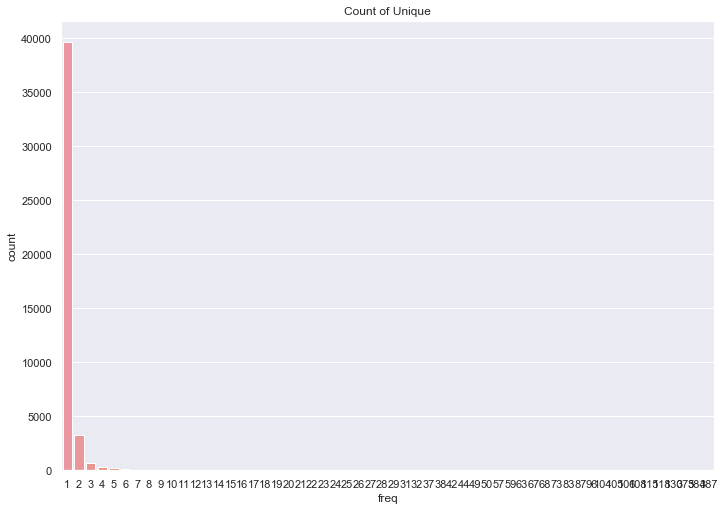

In [148]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='freq', data=unique).set_title('Count of Unique')

Text(0.5, 1.0, 'Count of Unique with xlim = (3,none)')

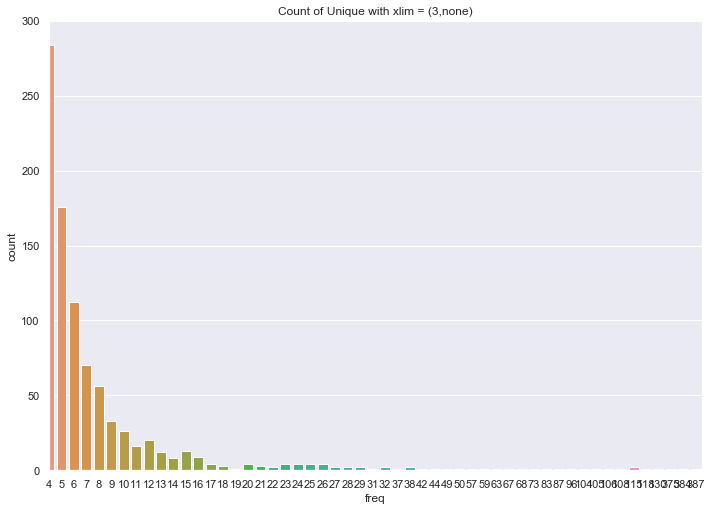

In [152]:
#filter out 1 -3 to see the rest of the distribution
ax = sns.countplot(x='freq', data=unique)
ax.set(xlim=(3, None), ylim=(0,300))
ax.set_title('Count of Unique with xlim = (3,none)')

Comment: As expected, most of the titles are unique or have small number of exact duplication (counts are highest at number of duplicate = 1(unique),2,3.. and lowest when the number of duplicates increases).

5.2 Bar chart for "near-duplication":
We will plot both k=2 and k=3 to see which k produces the most similar distribution as the count of unique graph

In [144]:
k2 = dict(index2.bucket)
ck2 = {key:len(value) for key, value in k2.items()}
ck2

{'1f7d41:0': 1,
 'ab4e3:1': 1,
 '3dfd53:2': 1,
 'ea10c:0': 1,
 '2c4de:1': 1,
 '1a1fc4:2': 1,
 '600:0': 1,
 '2b29a:1': 1,
 'b8c93:2': 1,
 'bdcbe:0': 1,
 '1f2287:1': 1,
 '190b5:2': 1,
 '1e0226:0': 4,
 '15325c:1': 4,
 '213b42:2': 4,
 'e00a7:0': 7,
 '15725c:1': 7,
 '13346:2': 7,
 '1e4232:0': 6,
 'd2214:1': 6,
 '11302:2': 6,
 '167c26:0': 2,
 'f762c:1': 2,
 '20de46:2': 2,
 '8b581:0': 3,
 'ad4ab:1': 3,
 '140523:2': 2,
 '146db1:0': 1,
 'd12d2:1': 1,
 '1b5f42:2': 1,
 '294c9:0': 9,
 'b375f:1': 9,
 '3a89b7:2': 9,
 'a6448:0': 3,
 '766d0:1': 1,
 'dd987:2': 1,
 '1e6730:0': 1,
 '1f32de:1': 1,
 '1d53:2': 1,
 'f9b81:0': 1,
 'b4214:1': 1,
 '5db4b:2': 1,
 'e4604:0': 1,
 'a03a8:1': 6,
 '1ec0c3:2': 1,
 'e1413:0': 1,
 'b5686:1': 1,
 '35510f:2': 1,
 'fcc94:0': 1,
 '4a756:1': 1,
 'e9f9c:2': 1,
 '1c3c84:0': 1,
 'f8655:1': 1,
 '27a2d3:2': 1,
 'cbda9:0': 3,
 'c8a0f:1': 2,
 '4cddd:2': 2,
 '1eee21:0': 1,
 '1566ec:1': 1,
 'ed9d2:2': 1,
 '1a2d96:0': 2,
 '12d710:1': 1,
 '11dec7:2': 1,
 '2cc32:0': 375,
 'da20a:1': 375

In [145]:
uk2 = pandas.DataFrame.from_dict(ck2, orient='index').reset_index().rename(columns={'index':'n', 0:'freq'})
uk2.head()

n  freq
0  1f7d41:0     1
1   ab4e3:1     1
2  3dfd53:2     1
3   ea10c:0     1
4   2c4de:1     1

In [146]:
uk2.freq.value_counts()

1      101759
2       13454
3        3384
4        1251
5         671
6         419
7         278
8         198
9         130
10        112
11         70
13         57
12         46
15         39
14         31
17         27
16         23
18         21
22         17
26         15
25         14
24         14
21         12
27         10
19          9
23          6
31          6
38          5
32          5
30          5
        ...  
384         3
138         2
69          2
89          2
83          2
41          2
118         2
50          2
111         2
20          2
107         2
110         2
35          2
61          2
137         1
52          1
121         1
120         1
66          1
85          1
67          1
117         1
115         1
40          1
112         1
90          1
71          1
108         1
39          1
62          1
Name: freq, Length: 76, dtype: int64

Text(0.5, 1.0, 'Count with K=2')

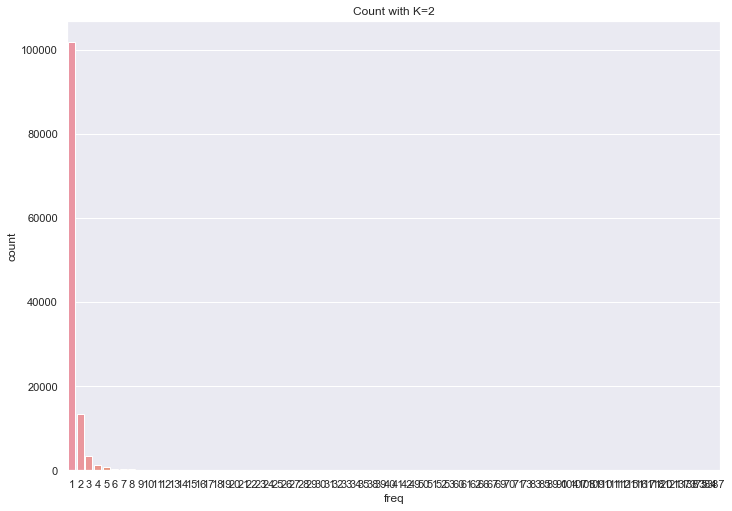

In [153]:
sns.countplot(x='freq', data=uk2).set_title('Count with K=2')

Text(0.5, 1.0, 'Count with K=2 with xlim = (6,none)')

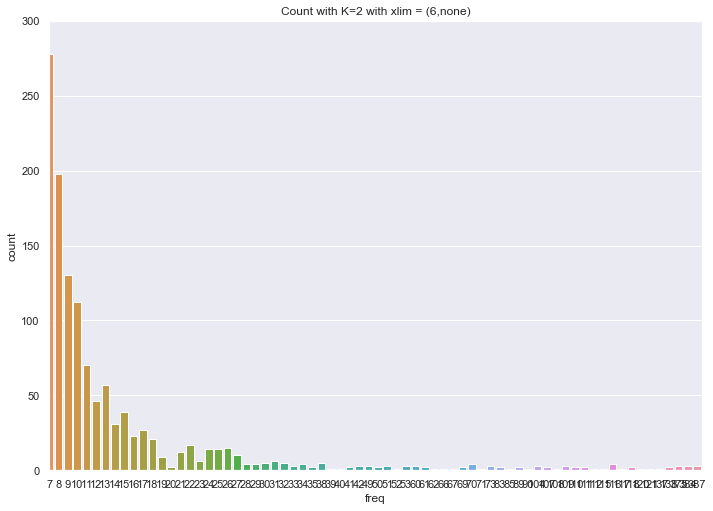

In [155]:
#filter out 1 - 6 to see the rest of the distribution
ax = sns.countplot(x='freq', data=uk2)
ax.set(xlim=(6, None), ylim=(0,300))
ax.set_title('Count with K=2 with xlim = (6,none)')

In [157]:
k3 = dict(index.bucket)
ck3 = {key:len(value) for key, value in k3.items()}
ck3

{'7d41:0': 2,
 '9c7f:1': 1,
 '4d56:2': 7,
 'f7f5:3': 1,
 'a10c:0': 1,
 '9bce:1': 8,
 '1058:2': 1,
 '687f:3': 1,
 '600:0': 1,
 '5340:1': 6,
 '4c56:2': 10,
 '2e32:3': 1,
 'dcbe:0': 1,
 '50eb:1': 1,
 'd7e4:2': 1,
 '642:3': 4,
 '226:0': 4,
 '4b9e:1': 12,
 'aa6:2': 11,
 '84ed:3': 8,
 'a7:0': 8,
 '4b8e:1': 11,
 '1aae:2': 7,
 '4cd:3': 7,
 '4232:0': 6,
 '429e:1': 7,
 '9a4:2': 13,
 '44c:3': 6,
 '7c26:0': 3,
 'c596:1': 2,
 '19ee:2': 3,
 '8379:3': 5,
 'b581:0': 14,
 '9568:1': 3,
 '8d5a:2': 11,
 '5014:3': 9,
 '6db1:0': 3,
 '5a54:1': 4,
 '9a2:2': 32,
 '6d7d:3': 2,
 '94c9:0': 10,
 'ebe2:1': 9,
 'dd66:2': 13,
 'ea26:3': 12,
 '6448:0': 3,
 'da0a:1': 5,
 '1cec:2': 1,
 '3766:3': 11,
 '6730:0': 8,
 '5bde:1': 13,
 '4fe6:2': 1,
 '75:3': 4,
 '9b81:0': 4,
 '428f:1': 1,
 '2d68:2': 24,
 '176d:3': 7,
 '4604:0': 2,
 '750e:1': 3,
 'd40:2': 23,
 '7b03:3': 1,
 '1413:0': 3,
 'd0ce:1': 25,
 '3d6a:2': 6,
 'd544:3': 3,
 'cc94:0': 7,
 'eacf:1': 3,
 '7094:2': 2,
 '3a7e:3': 1,
 '3c84:0': 9,
 'cabc:1': 1,
 '4df0:2': 10,
 '

In [158]:
uk3 = pandas.DataFrame.from_dict(ck3, orient='index').reset_index().rename(columns={'index':'n', 0:'freq'})
uk3.head()

n  freq
0  7d41:0     2
1  9c7f:1     1
2  4d56:2     7
3  f7f5:3     1
4  a10c:0     1

In [159]:
uk3.freq.value_counts()

1      45722
2      18422
3       9130
4       4913
5       2944
6       1951
7       1316
8        911
9        675
10       522
11       359
12       295
13       227
14       194
15       133
17       115
16       110
18        68
19        62
21        56
20        50
23        40
22        37
25        34
26        30
27        24
24        24
29        23
31        19
28        18
       ...  
117        1
68         1
59         1
131        1
386        1
66         1
385        1
129        1
125        1
115        1
88         1
72         1
79         1
90         1
62         1
83         1
92         1
93         1
98         1
39         1
43         1
392        1
397        1
141        1
108        1
75         1
138        1
74         1
112        1
384        1
Name: freq, Length: 108, dtype: int64

Text(0.5, 1.0, 'Count with K=3')

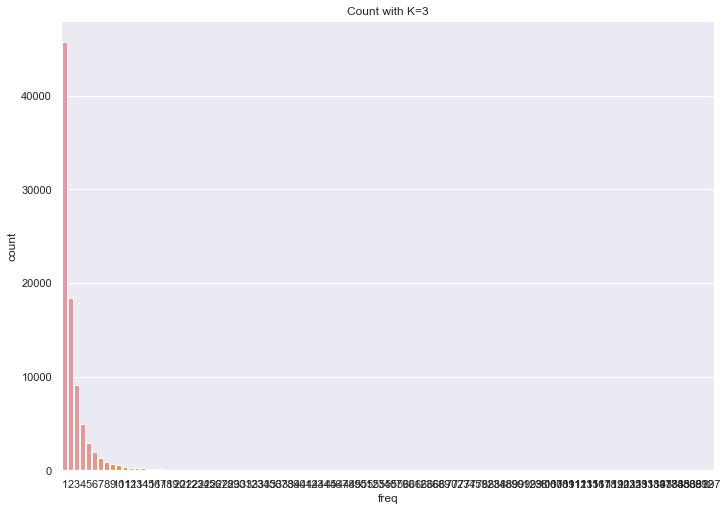

In [160]:
sns.countplot(x='freq', data=uk3).set_title('Count with K=3')

Text(0.5, 1.0, 'Count with K=3 with xlim = (6,none)')

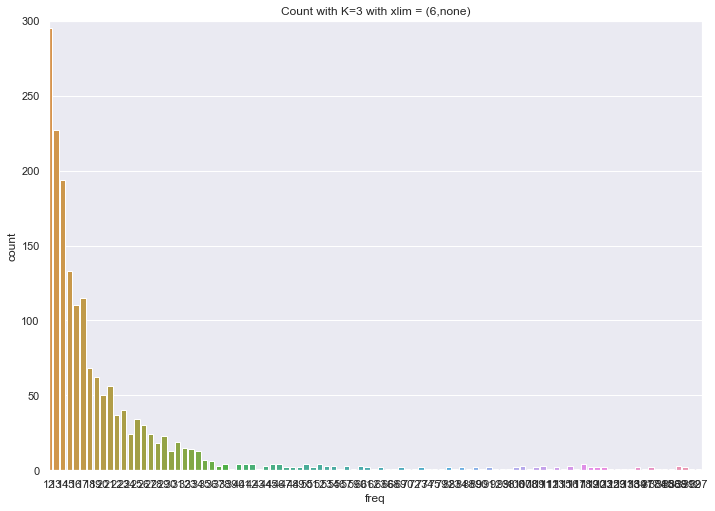

In [162]:
#filter out 1 - 11 to see the rest of the distribution
ax = sns.countplot(x='freq', data=uk3)
ax.set(xlim=(11, None), ylim=(0,300))
ax.set_title('Count with K=3 with xlim = (6,none)')

Comment: Based on the graphs and the unique_value_counts table, K=3 has the most similar distribution to count of unique. They have a similar number of unique articles. When number of duplicate = 1, count of unique reported around 40k of articles, count with k=2 has 100k and k=3 has 45k. The rest of the disribution are similar and therefore, we conclude that k=3 is the best parameter for identifying "nearly duplicate" article titles. 